Process Data Reference: https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data#1.-Introduction

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image

In [5]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [6]:
# from google.colab import files
# uploaded = files.upload()

In [7]:
# import file
raw_df = pd.read_csv('card_transdata.csv')
# print(raw_df)

Analysis of Data

In [8]:
header = pd.read_csv('card_transdata.csv', index_col=0, nrows=0).columns.tolist()
print(header)

['distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']


In [9]:
labels=["Genuine","Fraud"]

fraud_or_not = raw_df["fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=raw_df['fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

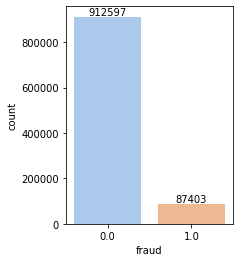

In [10]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='fraud',data=raw_df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [11]:
print('Genuine:', round(raw_df['fraud'].value_counts()[0]/len(raw_df) * 100,2), '% of the dataset')
print('Frauds:', round(raw_df['fraud'].value_counts()[1]/len(raw_df) * 100,2), '% of the dataset')

Genuine: 91.26 % of the dataset
Frauds: 8.74 % of the dataset


Data Pre-processing

In [12]:
# Dropping duplicated values
df = raw_df.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [13]:
# Train test split
X = df.drop('fraud', axis=1)
y = df['fraud']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [15]:
# Oversample/undersample
# SMOTE - fail - run too long...

Oversample/undersample Data: Ref link: https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset

In [16]:
# Random Oversampling
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)

In [17]:
# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)

In [18]:
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

Genuine: 638818 / 50.0 % of the dataset
Frauds: 638818 / 50.0 % of the dataset


Imbalanced-Learn Pipeline
1. Oversample the minority class.
2. Train the classifier on the training segment.
3. alidate the classifier on the remaining segment.


In [19]:
# This Pipeline is only done part 1
# This part 2 and part 3 requires too long

In [20]:
'''
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline, make_pipeline

random_overs_pipeline = make_pipeline(RandomOverSampler(random_state=42), 
                              RandomForestClassifier(n_estimators=100, random_state=13))

score2 = cross_val_score(random_overs_pipeline, X_train, y_train, scoring='recall')
print("Cross Validation Recall Scores are: {}".format(score2))
print("Average Cross Validation Recall score: {}".format(score2.mean()))

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_over_rf = GridSearchCV(random_overs_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_over_rf.fit(X_train, y_train)

print('Best parameters:', grid_over_rf.best_params_)
print('Best score:', grid_over_rf.best_score_)

y_pred = grid_over_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

cm = confusion_matrix(y_test, y_pred)

over_rf_Recall = recall_score(y_test, y_pred)
over_rf_Precision = precision_score(y_test, y_pred)
over_rf_f1 = f1_score(y_test, y_pred)
over_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

ndf = [(over_rf_Recall, over_rf_Precision, over_rf_f1, over_rf_accuracy)]

over_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
over_rf_score.insert(0, 'Random Forest with', 'Random Oversampling')
over_rf_score
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom imblearn.pipeline import Pipeline, make_pipeline\n\nrandom_overs_pipeline = make_pipeline(RandomOverSampler(random_state=42), \n                              RandomForestClassifier(n_estimators=100, random_state=13))\n\nscore2 = cross_val_score(random_overs_pipeline, X_train, y_train, scoring=\'recall\')\nprint("Cross Validation Recall Scores are: {}".format(score2))\nprint("Average Cross Validation Recall score: {}".format(score2.mean()))\n\nnew_params = {\'randomforestclassifier__\' + key: params[key] for key in params}\ngrid_over_rf = GridSearchCV(random_overs_pipeline, param_grid=new_params, cv=kf, scoring=\'recall\',\n                        return_train_score=True)\ngrid_over_rf.fit(X_train, y_train)\n\nprint(\'Best parameters:\', grid_over_rf.best_params_)\nprint(\'Best score:\', grid_over_rf.best_score_)\n\ny_pred = grid_over_rf.best_estimator_.named_steps[\'randomforestclassifier\'].predict(X_test)\n\ncm = confusion_

In [21]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
dtypes: float64(7)
memory usage: 61.0 MB
None


Classification: https://www.kaggle.com/code/mattop/credit-card-fraud-classification-knn-dtree-rf

<AxesSubplot:>

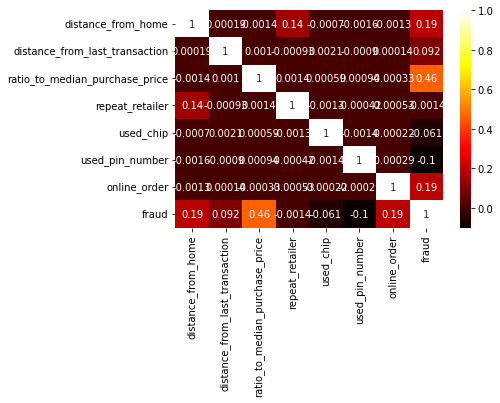

In [22]:
corr = df.corr()

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = "hot")

Machine Learning Model Below

In [ ]:
# # Use the classifier to predict whether the transaction is fraudulent
#     prediction = clf.predict([transaction[features]])[0]
    
#     # If the prediction is positive, send the transaction to a human expert for review
#     if prediction == 1:
#         expert_feedback = get_expert_feedback(transaction)
#         if expert_feedback == 'fraudulent':
#             # Update the target variable for the transaction to indicate that it is fraudulent
#             data.at[index, target] = 1
#             # Retrain the classifier on the updated dataset
#             clf.fit(data[features], data[target])


## KNN

In [23]:
# Empty lists for appending each value of k
train_accuracy = []
test_accuracy = []

In [24]:
# Iterate through values of k and store results
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score

for k in range(3, 16):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

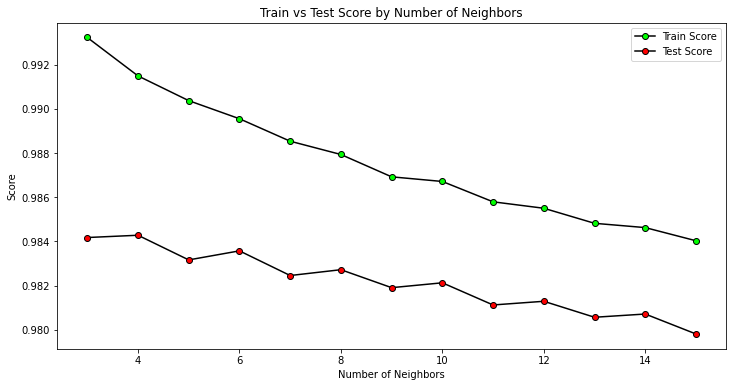

In [25]:
# Displaying model accuracy for different values of k
plt.figure(figsize = (12, 6))

plt.plot(range(3, 16), train_accuracy, label = "Train Score",
         marker = "o", markerfacecolor = "#00FF00", color = "#000000")

plt.plot(range(3, 16), test_accuracy, label = "Test Score", 
         marker = "o", markerfacecolor = "#FF0000", color = "#000000")

plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("Train vs Test Score by Number of Neighbors")
plt.legend()
plt.show()

In [26]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[270886,   2893],
       [  1855,  24366]])

In [27]:
precision_score(y_test, y_pred)

0.8938699145236436

Text(87.0, 0.5, 'Truth')

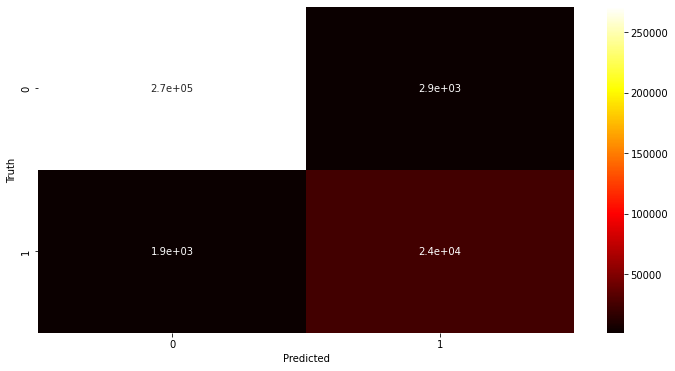

In [28]:
plt.figure(figsize = (12, 6))

sns.heatmap(cm, annot = True, cmap = "hot")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [29]:
accuracy = knn.score(X_test, y_test)
print("KNN Accuracy:",accuracy)
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.9841733333333333
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    273779
         1.0       0.89      0.93      0.91     26221

    accuracy                           0.98    300000
   macro avg       0.94      0.96      0.95    300000
weighted avg       0.98      0.98      0.98    300000



### DT

In [30]:
dt = DecisionTreeClassifier(random_state = 5)  
dt.fit(X_train, y_train) 
y_pred = dt.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[273778,      1],
       [     3,  26218]])

In [32]:
precision_score(y_test, y_pred)


0.9999618597200504

Text(87.0, 0.5, 'Truth')

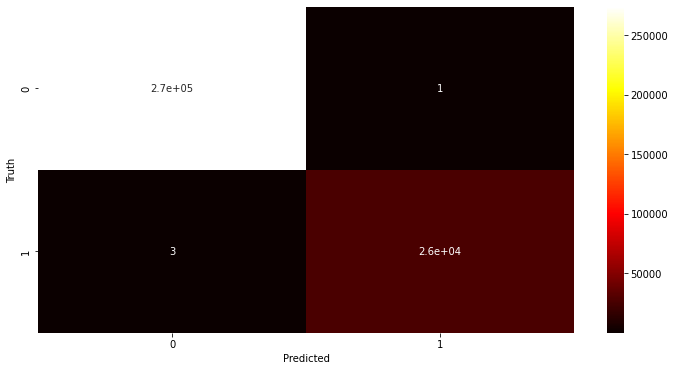

In [33]:
plt.figure(figsize = (12, 6))

sns.heatmap(cm, annot = True, cmap = "hot")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [34]:
accuracy = dt.score(X_test, y_test)
print("DT Accuracy:",accuracy)
print(classification_report(y_test, y_pred))

DT Accuracy: 0.9999866666666667
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       1.00      1.00      1.00     26221

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



## RF

In [35]:
rf = RandomForestClassifier(random_state = 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[273779,      0],
       [     5,  26216]])

In [36]:
precision_score(y_test, y_pred)

1.0

Text(87.0, 0.5, 'Truth')

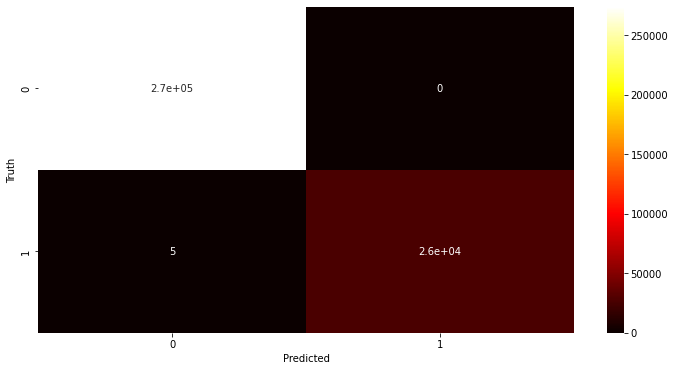

In [37]:
plt.figure(figsize = (12, 6))

sns.heatmap(cm, annot = True, cmap = "hot")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [38]:
accuracy = rf.score(X_test, y_test)
print("RF Accuracy:",accuracy)
print(classification_report(y_test, y_pred))

RF Accuracy: 0.9999833333333333
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       1.00      1.00      1.00     26221

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

